<p style = "font-size : 50px; color : #ffff ; text-align : center; background-color : #ff9abf; border-radius: 4px 4px;"><strong>US Airline Tweets Sentiment Analysis </strong></p>




<img  style="float: center;  border:5px solid #ffb037;"  src="https://cdn.dribbble.com/users/674925/screenshots/3553461/media/d9709f9de2daa05e7a2ff13e10f98c82.gif">

This project explores tweets sent by customers of various US airline in 2015 using natural language processing. The data is carefully cleaned and transformed to numerical values. Various ML models are used to predict the sentiments after handling the imbalance in the dataset. The sentiment analysis is based on the tweets being neutral, positive, and negative. 


## Objective
- Extract all verb phrases from the dataset and save them in different lines in a file named "Verb Phrases" for  &lt;airline_sentiment&gt; Review .txt” (You can choose your own grammar for noun phrase). Here &lt;airline_sentiment&gt; will have three different values: positive , negative, and neutral. Hence, three files will be created. For each sentiment, make a well labeled pie chart showing the distribution of noun phrases and verb phrases of that sentiment from the data set. Use the files created above to get the frequencies. 

- Design a machine learning algorithm and handle the imbalance in the dataset to predict the airline sentiment.
    
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#ffb037;font-family:newtimeroman;color:##2243b6;font-size:150%;text-align:center;border-radius:8px 10px;">Overview of the project</p>   

## Key steps I have used are: 
    
### 1) Load Dataset 

### 2) DATA Visualization   

### 3) Data Preprocessing, Cleaning, and Creating
    
### 4) Handling Data Imbalnce         

### 5) Model Building and Development - Training/Testing and Cross-Validation  

<a id="1"></a>
# <p style="background-color:#ffb037;font-family:newtimeroman;color:#2243b6;font-size:100%;text-align:center;border-radius:8px 10px;">LOAD KEY LIBRARIES</p>    

In [1]:
import os 
import pandas as pd
import numpy as np
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from termcolor import cprint
from wordcloud import WordCloud
from collections import Counter
import string
from itertools import cycle

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
import contractions
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,RidgeClassifierCV,RidgeClassifier, Perceptron
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn import svm
#from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier 
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score,f1_score,auc # Performance Metrics 
from sklearn.metrics import precision_score, recall_score,roc_curve,precision_recall_curve,roc_auc_score
from sklearn.model_selection import RepeatedKFold

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

from sklearn.model_selection import ShuffleSplit, cross_validate

import warnings   


warnings.filterwarnings('ignore')
alltokenize =False # Use the check the best maping of the texts

<a id="1"></a>
# <p style="background-color:#ffb037;font-family:newtimeroman;color:#2243b6;font-size:100%;text-align:center;border-radius:8px 10px;">LOAD DATASET</p>    

In [2]:
df = pd.read_csv('Tweets.csv')

In [3]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [4]:
# First of all let's drop the columns which we don't required

remove_cols = ['tweet_id', 'airline_sentiment_confidence',
       'negativereason_confidence',
       'airline_sentiment_gold', 'negativereason_gold',
       'tweet_coord',
       'tweet_location', 'user_timezone']

df = df.drop(remove_cols, axis = 1)
df.head()

airline_sentiment negativereason         airline        name  retweet_count  \
0           neutral            NaN  Virgin America     cairdin              0   
1          positive            NaN  Virgin America    jnardino              0   
2           neutral            NaN  Virgin America  yvonnalynn              0   
3          negative     Bad Flight  Virgin America    jnardino              0   
4          negative     Can't Tell  Virgin America    jnardino              0   

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

               tweet_created  
0  2015-02-24 11:35:52 -0800  
1  2015-02-24 11:15:59 -0800  
2  2015-02-24 11:15:48 -0800  
3  2015-02-24 11:15:36 -0800  
4  2015-02-24 11:14:45 -0800

<a id="1"></a>
# <p style="background-color:#ffb037;font-family:newtimeroman;color:#2243b6;font-size:100%;text-align:center;border-radius:8px 10px;">DATA VISUALIZATION</p>    

Text(0, 0.5, 'Number of Tweets')

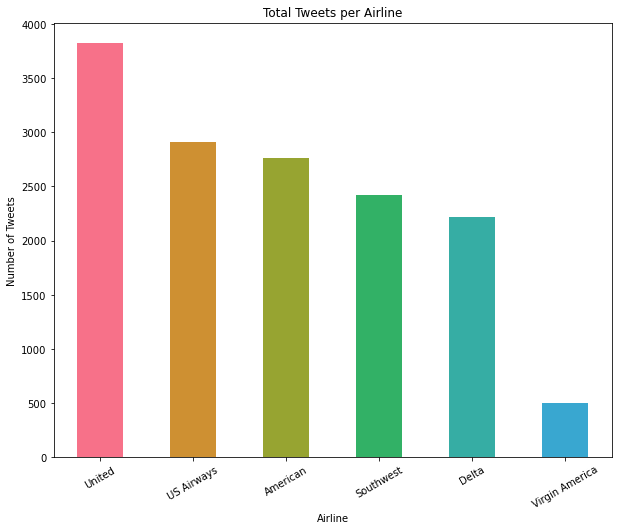

In [5]:
colors=sns.color_palette('husl',8)
pd.Series(df['airline']).value_counts().plot(kind="bar",color=colors,figsize=(10,8),fontsize=10,rot=30,title='Total Tweets per Airline')
plt.xlabel('Airline',fontsize=10)
plt.ylabel('Number of Tweets',fontsize=10)

In [6]:
# Percentage
test = df
test = test.rename(columns={'airline':'Percentage distribution of Total Tweets Per Airline'})
percentage = pd.DataFrame(round(test['Percentage distribution of Total Tweets Per Airline'].value_counts().sort_values(ascending=False) / len(df) * 100, 2))
display(percentage) 

Percentage distribution of Total Tweets Per Airline
United                                                      26.11  
US Airways                                                  19.90  
American                                                    18.85  
Southwest                                                   16.53  
Delta                                                       15.18  
Virgin America                                               3.44

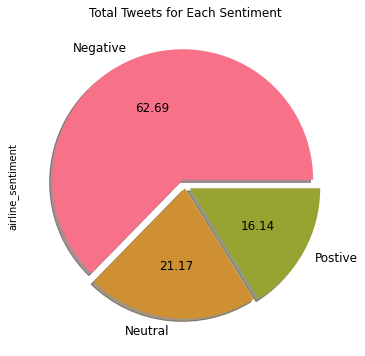

In [7]:
# View the sentiments
pd.Series(df['airline_sentiment']).value_counts().plot(kind='pie',
                                                       colors=colors,labels=['Negative','Neutral','Postive'],
                                                       explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',
                                                       fontsize=12,figsize=(6,6),
                                                       title="Total Tweets for Each Sentiment")

plt.show()

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

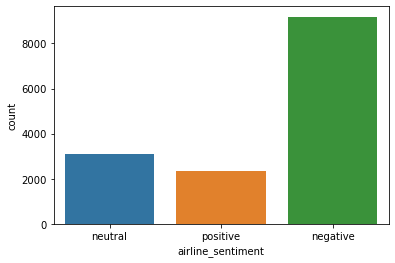

In [8]:
# Replotting
sns.countplot(x = "airline_sentiment", data = df)

In [9]:
test = df
test = test.rename(columns={'airline_sentiment':'Percentage distribution of Airline Sentiment'})
percentage_sentiment = pd.DataFrame(round(test['Percentage distribution of Airline Sentiment'].value_counts().sort_values(ascending=False) / len(df) * 100, 2))
display(percentage_sentiment) 

Percentage distribution of Airline Sentiment
negative                                         62.69
neutral                                          21.17
positive                                         16.14

Total Null Values in dataset :
airline_sentiment       0
negativereason       5462
airline                 0
name                    0
retweet_count           0
text                    0
tweet_created           0
dtype: int64


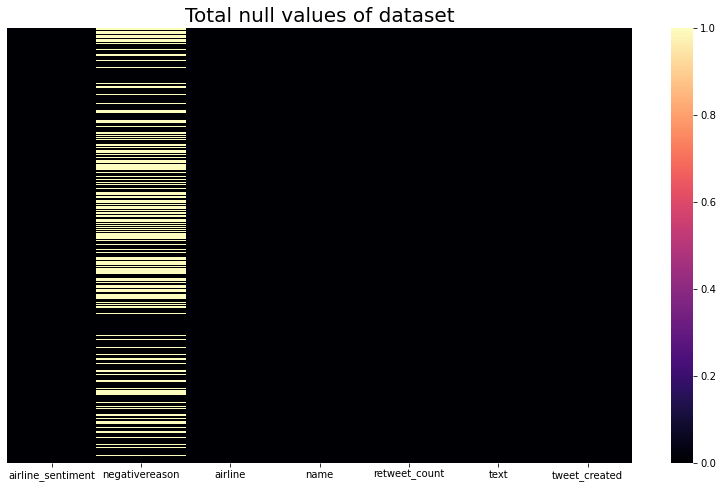

In [10]:
# Check for null values
cprint('Total Null Values in dataset :','green')
print(df.isnull().sum()) # showing null values of train data
plt.figure(figsize=(14,8))


# visualize null values
sns.heatmap(df.isnull(), yticklabels = False, cmap='magma')
plt.title('Total null values of dataset',size=20);

Total number of sentiments of tweets :
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


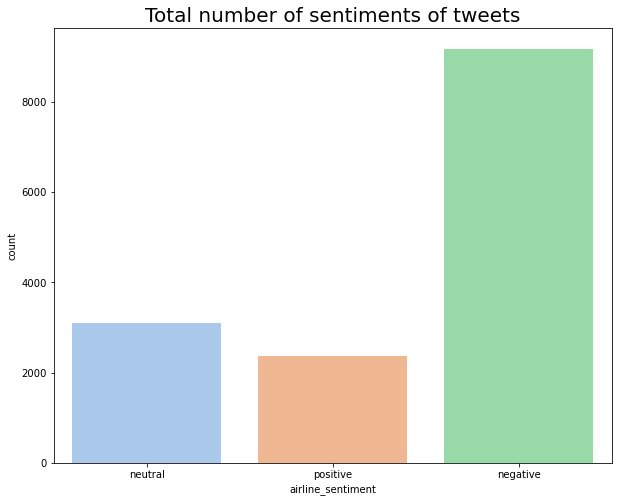

In [11]:
cprint("Total number of sentiments of tweets :",'green')
print(df.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

Total number of tweets for each airline :
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


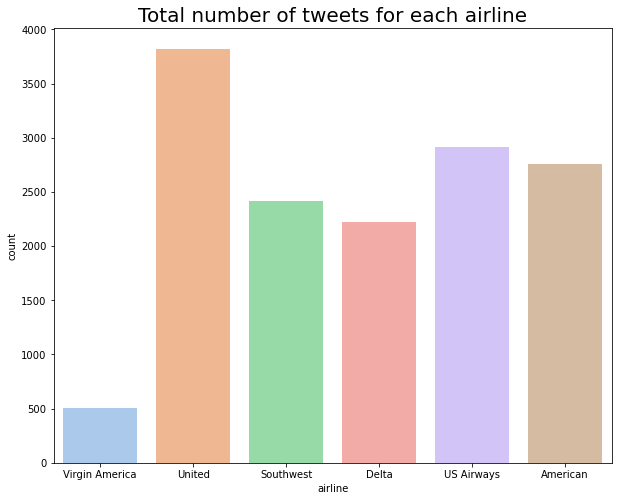

Total number of sentiment tweets for each airline :
US Airways : 
 negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
United : 
 negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
American : 
 negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
Southwest : 
 negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
Delta : 
 negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
Virgin America : 
 negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


In [12]:
cprint("Total number of tweets for each airline :",'blue')
print(df.groupby('airline')['airline_sentiment'].count())


plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 20)
plt.show()


cprint("Total number of sentiment tweets for each airline :",'green')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America'] # We can reorder it 
for i in airlines :
    print('{} : \n'.format(i),df.loc[df.airline == i].airline_sentiment.value_counts())

In [13]:
# Look at the percentage distributions
test = df
test=test.rename(columns={'airline_sentiment':'Sentiments'})
sentiment_df = test.groupby('airline')['Sentiments'].value_counts()
sentiment_df_percentage = round(sentiment_df / len(df) * 100, 2)
pd.DataFrame(sentiment_df)

Sentiments
airline        Sentiments            
American       negative          1960
               neutral            463
               positive           336
Delta          negative           955
               neutral            723
               positive           544
Southwest      negative          1186
               neutral            664
               positive           570
US Airways     negative          2263
               neutral            381
               positive           269
United         negative          2633
               neutral            697
               positive           492
Virgin America negative           181
               neutral            171
               positive           152

In [14]:
# Look at the percentage distribution
pd.DataFrame(sentiment_df_percentage.sort_values(ascending=False))

Sentiments
airline        Sentiments            
United         negative         17.98
US Airways     negative         15.46
American       negative         13.39
Southwest      negative          8.10
Delta          negative          6.52
               neutral           4.94
United         neutral           4.76
Southwest      neutral           4.54
               positive          3.89
Delta          positive          3.72
United         positive          3.36
American       neutral           3.16
US Airways     neutral           2.60
American       positive          2.30
US Airways     positive          1.84
Virgin America negative          1.24
               neutral           1.17
               positive          1.04

Reasons Of Negative Tweets :
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


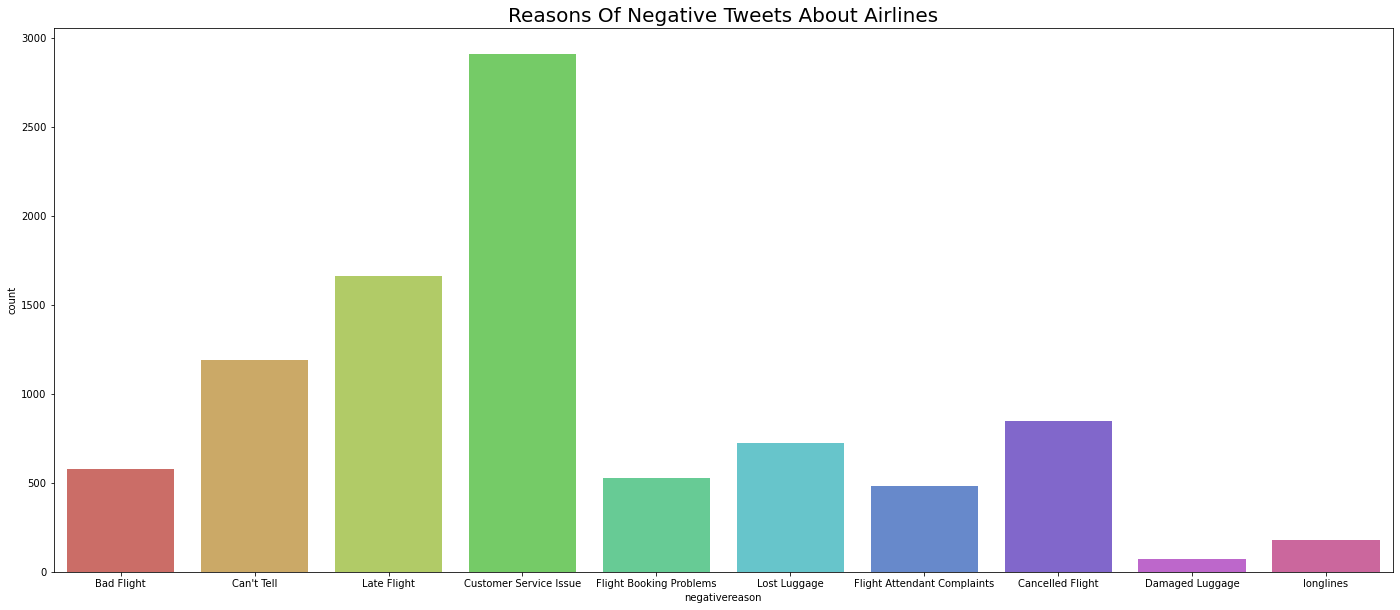

In [15]:
# Check the reason for the negative twitter
cprint('Reasons Of Negative Tweets :','red')
print(df.negativereason.value_counts())

plt.figure(figsize = (24, 10))
sns.countplot(x = 'negativereason', data = df, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

In [16]:
# Percentage
test = df
test = test.rename(columns={'negativereason':'Percentage distribution of Negative Tweets'})
percentage = pd.DataFrame(round(test['Percentage distribution of Negative Tweets'].value_counts().sort_values(ascending=False) / len(df) * 100, 2))
display(percentage) 

Percentage distribution of Negative Tweets
Customer Service Issue                                            19.88
Late Flight                                                       11.37
Can't Tell                                                         8.13
Cancelled Flight                                                   5.79
Lost Luggage                                                       4.95
Bad Flight                                                         3.96
Flight Booking Problems                                            3.61
Flight Attendant Complaints                                        3.29
longlines                                                          1.22
Damaged Luggage                                                    0.51

In [17]:
# Check to see if the tweets are more in weekends or other days

df_modify = pd.to_datetime(df['tweet_created']).dt.strftime('%Y-%m-%d %H:%M:%S')
df_modify = pd.DataFrame(df_modify)
df_modify['year'] = pd.DatetimeIndex(df_modify['tweet_created']).year
df_modify['month'] = pd.DatetimeIndex(df_modify['tweet_created']).month
df_modify['dayofweek'] = pd.DatetimeIndex(df_modify['tweet_created']).dayofweek

day_map = {   # Map days from numbers to characters
    0: 'MON',
    1: 'TUE',
    2: 'WED',
    3: 'THU',
    4: 'FRI',
    5: 'SAT',
    6: 'SUN'
}
month_map = {   # Map days from numbers to characters
    0: 'JAN',
    1: 'FEB',
    2: 'MAR',
    3: 'APR',
    4: 'MAY',
    5: 'JUN',
    6: 'JUL',
    7: 'AUG',
    8: 'SEP',
    9: 'OCT',
    10: 'NOV',
    11: 'DEC'
}

df_modify['day_of_week_name'] = pd.DatetimeIndex(df_modify['tweet_created']).dayofweek.map(day_map)
df_modify['month_name'] = pd.DatetimeIndex(df_modify['tweet_created']).month.map(month_map)

df['day_of_week_name'] = df_modify['day_of_week_name']
df['month'] =df_modify['month'] 
df['month_name'] = df_modify['month_name']
df['tweet_day'] = pd.DatetimeIndex(df_modify['tweet_created']).day
df['tweet_time'] = pd.DatetimeIndex(df_modify['tweet_created']).hour

In [18]:
df.columns

Index(['airline_sentiment', 'negativereason', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'day_of_week_name', 'month',
       'month_name', 'tweet_day', 'tweet_time'],
      dtype='object')

Time of the tweets :
22    3079
23    3028
21    1557
20    1500
17    1408
19    1376
24    1344
18    1344
16       4
Name: tweet_day, dtype: int64


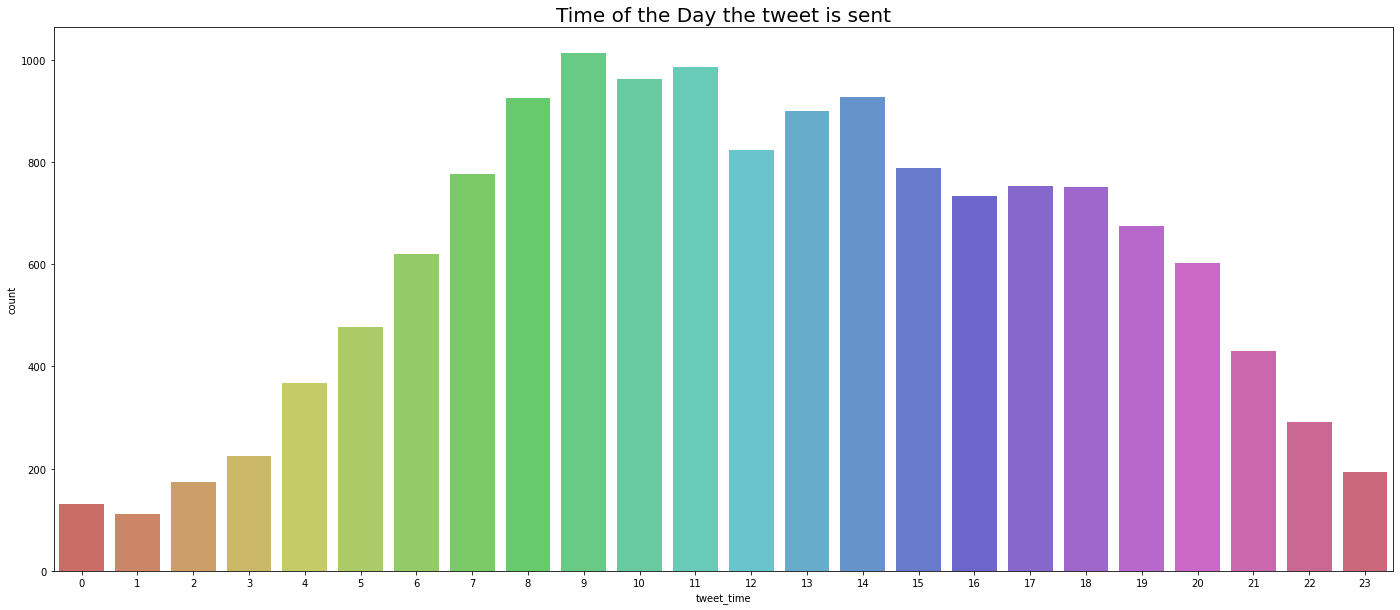

In [19]:
cprint('Time of the tweets :','blue')
print(df.tweet_day.value_counts())

plt.figure(figsize = (24, 10))
sns.countplot(x = 'tweet_time', data = df, palette = 'hls')
plt.title('Time of the Day the tweet is sent', fontsize = 20)
plt.show()

In [20]:
# Determine the frequency of negative tweets in each day and month
Month_Day_grouped = df.groupby(['month_name','day_of_week_name'],as_index=False)['negativereason'].count()
Month_Day_grouped_final = Month_Day_grouped.rename(columns={'negativereason':'Number_of_NegativeTweets_per_Day'})
Month_Day_grouped_final.head(10)


Month_Day_grouped_final['Percentage'] = np.around((Month_Day_grouped_final.Number_of_NegativeTweets_per_Day/Month_Day_grouped_final.Number_of_NegativeTweets_per_Day.sum())*100,decimals=3)
Month_Day_grouped_final

month_name day_of_week_name  Number_of_NegativeTweets_per_Day  Percentage
0        MAR              FRI                               835       9.098
1        MAR              MON                              1922      20.941
2        MAR              SAT                              1049      11.430
3        MAR              SUN                              2266      24.689
4        MAR              THU                               751       8.183
5        MAR              TUE                              1619      17.640
6        MAR              WED                               736       8.019

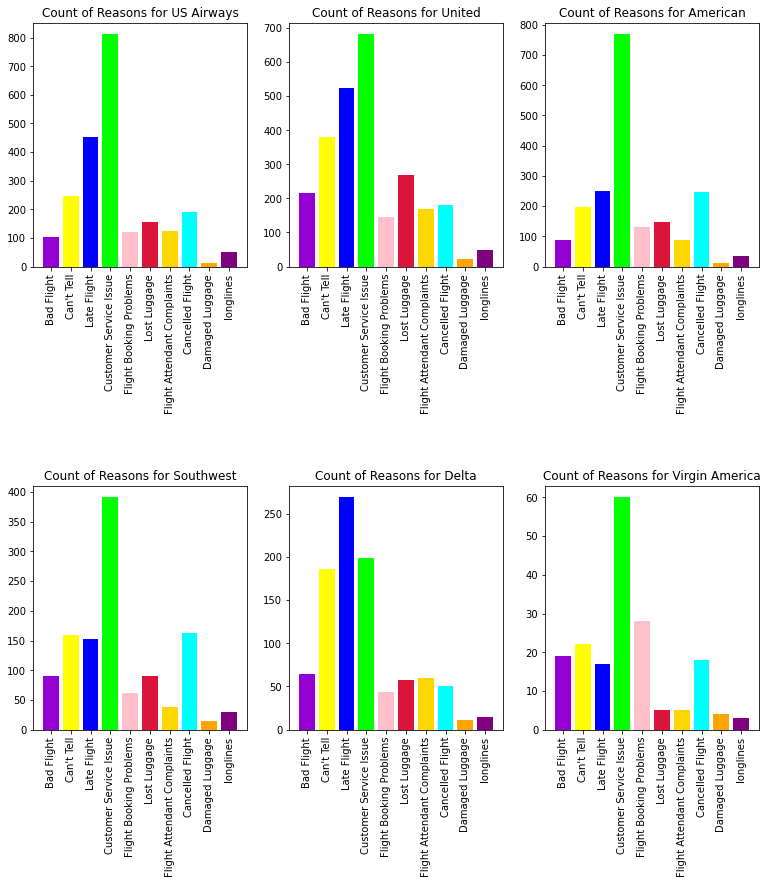

In [21]:
NR_Count=df['negativereason'].value_counts()
def NCount(Airline):
    airlineName =df[df['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= df['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)
    
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

In [22]:
# Split text of Sentiments    
positive = df[df['airline_sentiment'] == 'positive'].text
neutral  = df[df['airline_sentiment'] == 'neutral'].text
negative  = df[df['airline_sentiment'] == 'negative'].text

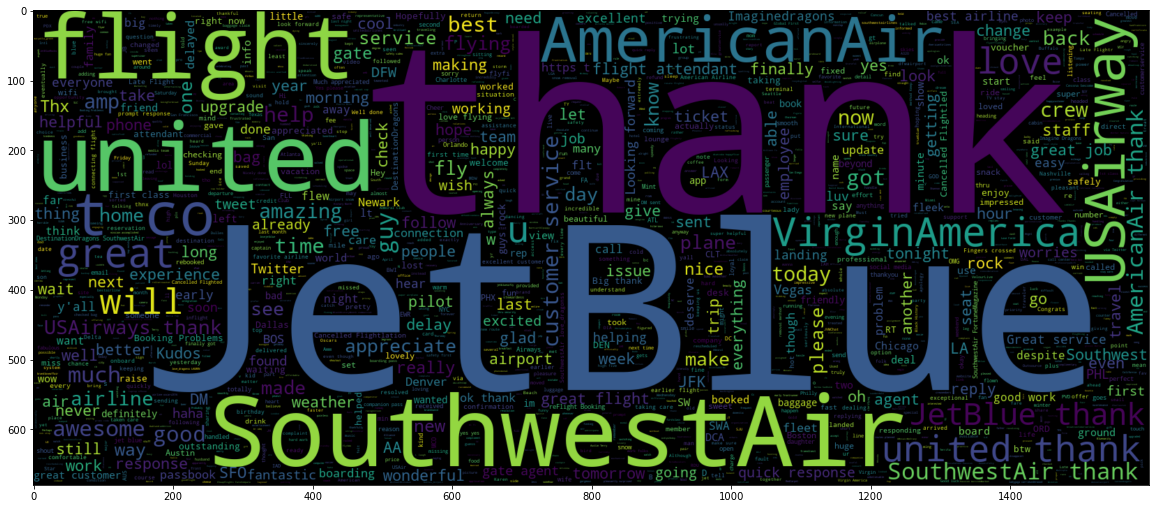

In [23]:
# world cloud of positive sentiments
plt.figure(figsize = (20,20)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(positive))
plt.imshow(worldcould_pos,interpolation = 'bilinear')
ax.grid(False)

In [24]:
# Define a function for the cloud count
def plot_wordcloud(data, text = None):
    #all_words = [word for each in data for word in each.split(' ')]
    word_freq = Counter(data)

    wordcloud = WordCloud(width = 900,
                          height = 500,
                          max_words = 200,
                          max_font_size = 100,
                          relative_scaling = 0.5,
                          background_color = "rgba(255, 255, 255, 0)", 
                          mode = "RGBA",
                          normalize_plurals = True).generate_from_frequencies(word_freq)
    plt.figure(figsize = (20, 20))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.title(text, fontsize = 20, color = 'blue', y = 1.05)
    plt.axis("off")
    plt.show()
    ax.grid(False)

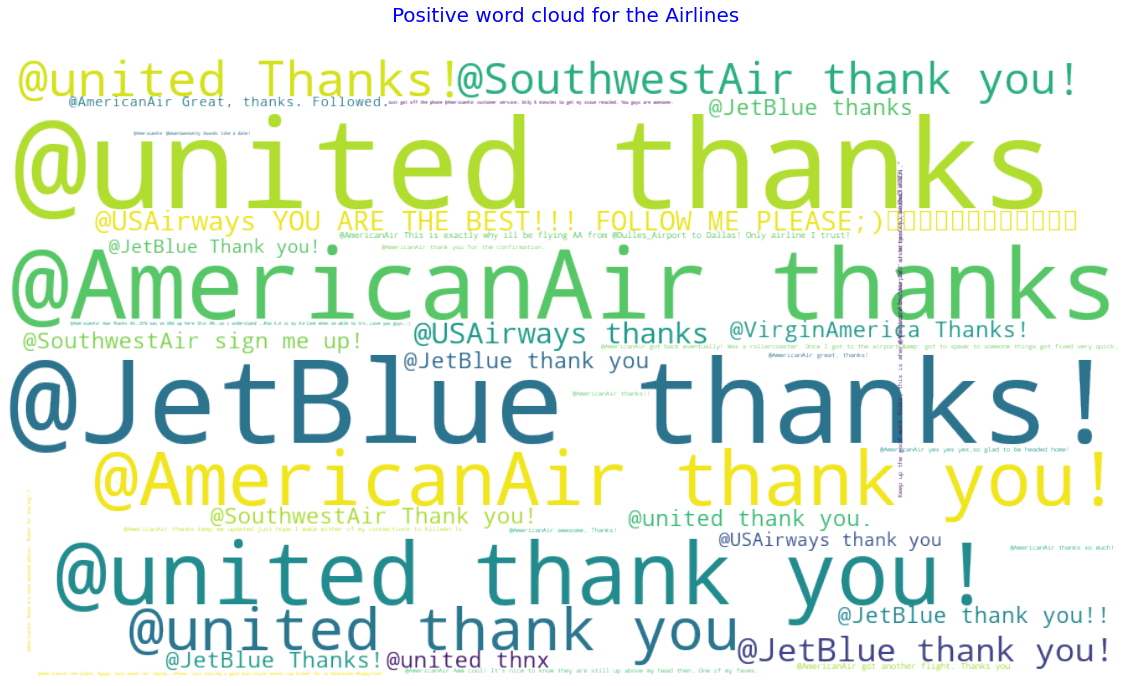

In [25]:
# Try the function
plot_wordcloud(positive,text='Positive word cloud for the Airlines')

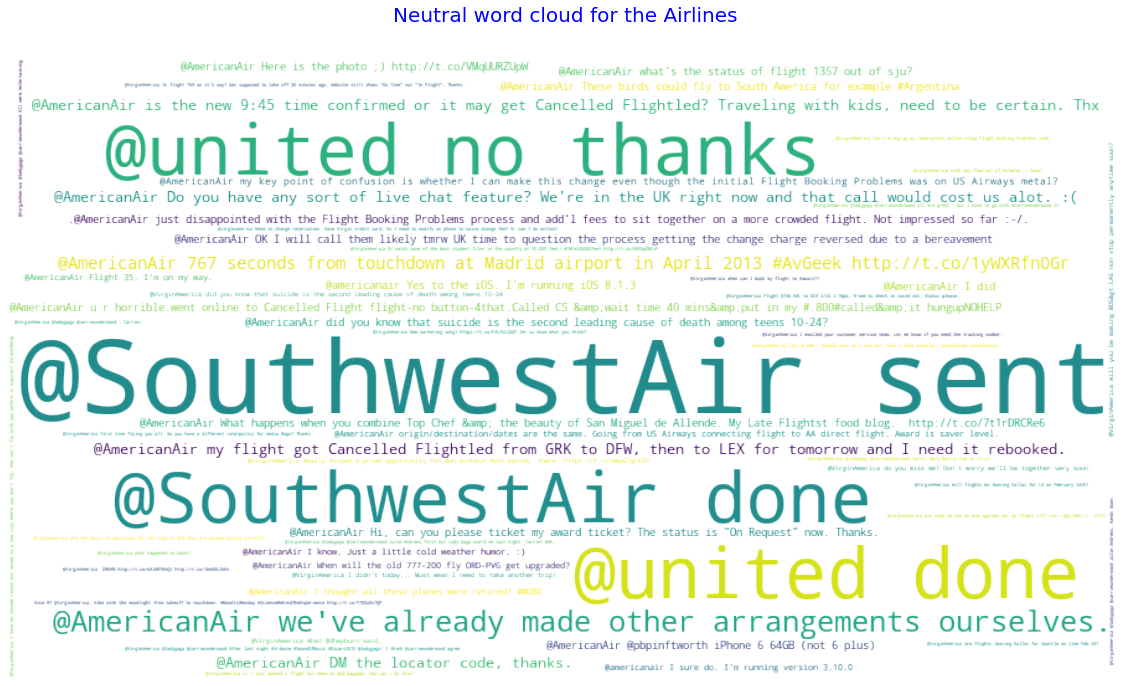

In [26]:
# Try the function
plot_wordcloud(neutral,text='Neutral word cloud for the Airlines')

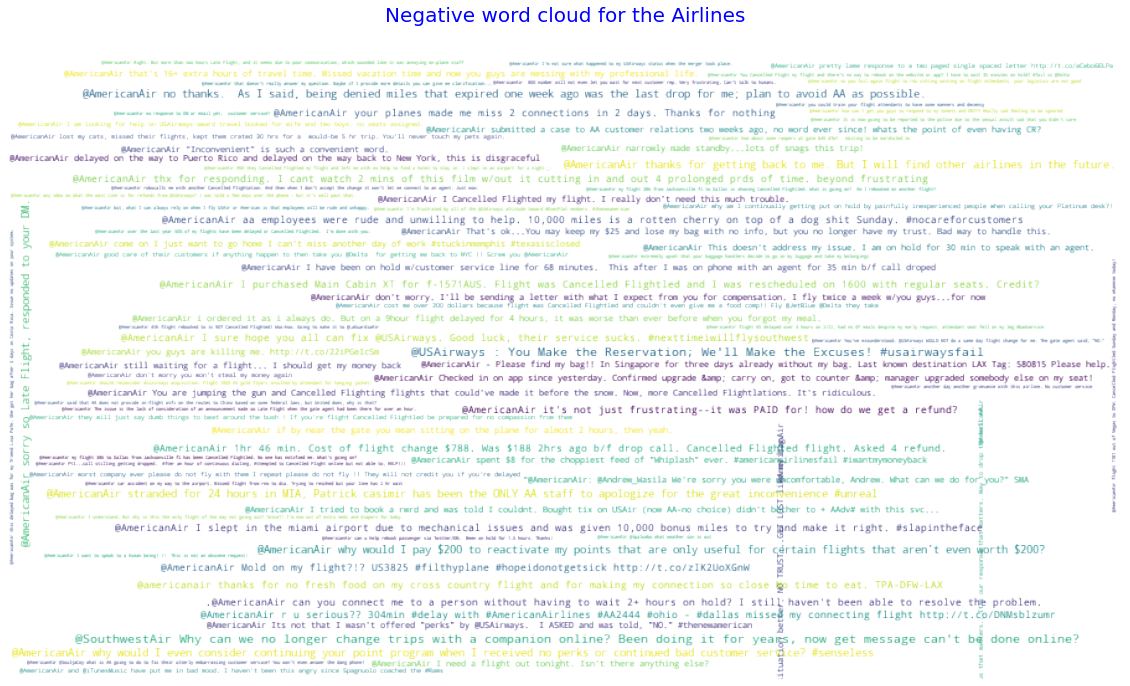

In [27]:
# Try the function
plot_wordcloud(negative,text='Negative word cloud for the Airlines')

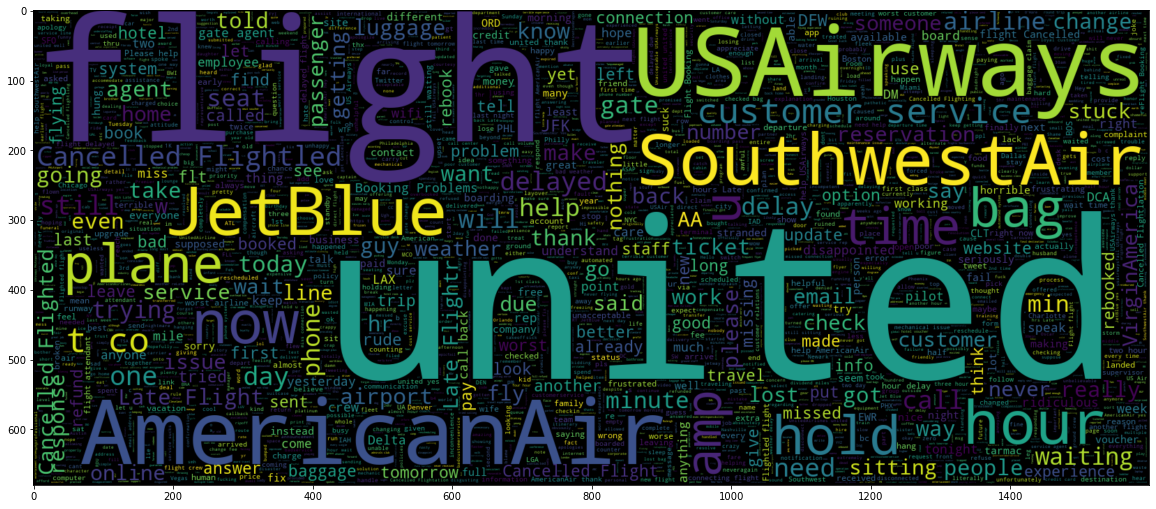

In [28]:
# world cloud of positive sentiments
plt.figure(figsize = (20,20)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(negative))
plt.imshow(worldcould_pos,interpolation = 'bilinear')
ax.grid(False)

<a id="1"></a>
# <p style="background-color:#ffb037;font-family:newtimeroman;color:#2243b6;font-size:100%;text-align:center;border-radius:8px 10px;">DATA PREPROCESSING, CLEANING, AND CREATING</p>    

In [29]:
# convert Sentiments to numerical values: 0 -> Neutral; 1 -> Positive; and 2 -> Negative
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 1
    elif sentiment == "neutral":
        return 0
    elif sentiment == "negative":
        return 2

In [30]:
# Apply convert_Sentiment function
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [31]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def tokenizetweet(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_dspace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_dspace

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute


# combaine negative reason with  tweet (if exsist)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text'] 

# Expand texts
df['final_text'] = df['final_text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df['final_text'] = [' '.join(map(str, l)) for l in df['final_text']] # Remove square brack
#df.head(5)


# Tokenize
tweet_tokens = []
tweet_tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
tokenize_column = df['final_text']
for sent in tokenize_column:
#    print(tweet_tokenizer.tokenize(sent))
    tweet_tokens.append(tweet_tokenizer.tokenize(sent))
    
tokenizers = {'TweetTokenizer': tweet_tokens}

# Leave the other functions might be needed for other types of texts or tweets

df['final_text'] = pd.DataFrame.from_dict(tokenizers)
df['final_text'] = [' '.join(map(str, l)) for l in df['final_text']]
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))
df['final_text'] = df['final_text'].apply(lambda x : tokenizetweet(x))
df.head(5)

airline_sentiment negativereason         airline        name  \
0                  0            NaN  Virgin America     cairdin   
1                  1            NaN  Virgin America    jnardino   
2                  0            NaN  Virgin America  yvonnalynn   
3                  2     Bad Flight  Virgin America    jnardino   
4                  2     Can't Tell  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

               tweet_created day_of_week_name  month month_name  tweet_day  \
0  2015-02-24 11:35:52 -0800              TUE      2        MAR         24   
1  2015-02-24 11:15:59 -0800              TUE      2        MAR         24   
2  2015-02-24 11:15:48 -0800              TUE      2        MAR         24   
3  2015-02-24 11:15:36 -0800              TUE      2        MAR         24   
4  2015-02-24 11:14:45 -0800              TUE      2        MAR         24   

   tweet_time                                         final_text  
0          11                                               said  
1          11            plus added commercials experience tacky  
2          11             today must mean need take another trip  
3          11  bad flight really aggressive blast obnoxious e...  
4          11                   cannot tell really big bad thing

In [32]:
if alltokenize==True:
    # Define all the tokenizers and check the best 
    tokenize_column = df['final_text']

    match_tokenizer = RegexpTokenizer("[\w']+")
    match_tokens = []
    for sent in tokenize_column:   
    #    print(match_tokenizer.tokenize(sent))
        match_tokens.append(match_tokenizer.tokenize(sent))


    punct_tokenizer = WordPunctTokenizer()
    punct_tokens = []

    for sent in tokenize_column:
    #    print(punct_tokenizer.tokenize(sent))
        punct_tokens.append(punct_tokenizer.tokenize(sent))

    tweet_tokens = []
    tweet_tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    for sent in tokenize_column:
    #    print(tweet_tokenizer.tokenize(sent))
        tweet_tokens.append(tweet_tokenizer.tokenize(sent))


    word_tokens = []
    for sent in tokenize_column:
    #    print(word_tokenize(sent))
        word_tokens.append(word_tokenize(sent))


    space_tokenizer = RegexpTokenizer("\s+", gaps=True)
    space_tokens = []
    for sent in tokenize_column:
    #    print(space_tokenizer.tokenize(sent))
        space_tokens.append(space_tokenizer.tokenize(sent))


    tokenizers = {'word_tokenize': word_tokens,
                 'WordPunctTokenize':punct_tokens,
                 'RegrexTokenizer for matching':match_tokens,
                 'RegrexTokenizer for white space': space_tokens,
                 'TweetTokenizer': tweet_tokens }

    tweets_all = pd.DataFrame.from_dict(tokenizers)
    tweets_all.head(3)

In [33]:
type(df["final_text"])

pandas.core.series.Series

In [34]:
df.head()

airline_sentiment negativereason         airline        name  \
0                  0            NaN  Virgin America     cairdin   
1                  1            NaN  Virgin America    jnardino   
2                  0            NaN  Virgin America  yvonnalynn   
3                  2     Bad Flight  Virgin America    jnardino   
4                  2     Can't Tell  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

               tweet_created day_of_week_name  month month_name  tweet_day  \
0  2015-02-24 11:35:52 -0800              TUE      2        MAR         24   
1  2015-02-24 11:15:59 -0800              TUE      2        MAR         24   
2  2015-02-24 11:15:48 -0800              TUE      2        MAR         24   
3  2015-02-24 11:15:36 -0800              TUE      2        MAR         24   
4  2015-02-24 11:14:45 -0800              TUE      2        MAR         24   

   tweet_time                                         final_text  
0          11                                               said  
1          11            plus added commercials experience tacky  
2          11             today must mean need take another trip  
3          11  bad flight really aggressive blast obnoxious e...  
4          11                   cannot tell really big bad thing

In [35]:
# Use LabelEncoding for the Airline name
#df['airline']=LabelEncoder().fit_transform(df['airline'])

In [36]:
# Define features and target
#features = ['final_text']
X = df['final_text'] 
y = df['airline_sentiment']
type(X)

pandas.core.series.Series

In [37]:
# Apply TFIDF on cleaned tweets
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)
X_final.shape

(14640, 12730)

In [38]:
#tfid = TfidfVectorizer(sublinear_tf=True, norm='l2', encoding='latin-1', stop_words='english')
#features = tfid.fit_transform(X).toarray()
#labels = X.columns
#print(features.shape)
#X_final =  tfid.fit_transform(X)#.toarray()
#X_final.shape

In [39]:
#vectorizer = CountVectorizer()
#X_final = X
#vectorizer.fit(X_final)
#X_final=vectorizer.transform(X_final)
#X_final=X_final.toarray()
#X_final.shape

In [40]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(X_final)

# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=tfid.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])

idf_weights
flight            1.939158
service           2.490206
customer          2.536106
issue             2.579563
late              3.044079
...                    ...
mis               9.898434
flightlanding     9.898434
miranda           9.898434
flightedstill     9.898434
zurichnew         9.898434

[12730 rows x 1 columns]

In [41]:
# Compute the TFIDF score for your documents
feature_names = tfid.get_feature_names() 

# count matrix 
count_vector=tfid.transform(X) 

# tf-idf scores 
tf_idf_vector=tfidf_transformer.transform(count_vector)

#get tfidf vector for 2nd document 
first_document_vector=tf_idf_vector[1] 
 
#print the scores 
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)

tfidf
tacky        0.676097
commercials  0.515791
added        0.393035
plus         0.291295
experience   0.193707
...               ...
gladys       0.000000
glamco       0.000000
glance       0.000000
glasgow      0.000000
zurichnew    0.000000

[12730 rows x 1 columns]

<a id="1"></a>
# <p style="background-color:#ffb037;font-family:newtimeroman;color:#2243b6;font-size:100%;text-align:center;border-radius:8px 10px;">HANDLING DATA IMBALANCE</p>    

In [42]:
# Handle imbalance in the data
# Handling imbalanced using SMOTE
correctimbalance = SMOTE()
X_sm,y_sm = correctimbalance.fit_resample(X_final,y)

In [43]:
# Quick check of the training/testing
X_train , X_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size=0.2,random_state=110)
xgb = XGBClassifier(eval_metric='mlogloss',objective = 'multi:softmax')
xgb.fit(X_train,y_train)
xgb_prediction =  xgb.predict(X_test)
accuracy_score(xgb_prediction,y_test)

0.9244597784637734

<a id="5"></a>
## <p style="background-color:#ffb037;font-family:newtimeroman;color:#2243b6;font-size:100%;text-align:center;border-radius:8px 10px;">MODEL BUILDING AND DEVELOPMENT: <br> Training/Testing and Cross-Validation  </p>  

In [44]:
X_train , X_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size=0.2,random_state=110)

MLA = [
    RandomForestClassifier(),
    LogisticRegression(solver='lbfgs', max_iter=10000,class_weight='balanced'),
   # LogisticRegressionCV(solver='lbfgs', max_iter=10000,class_weight='balanced'), # Expensive
   # RidgeClassifierCV(), # Expensive
    RidgeClassifier(),
    Perceptron(),
    BernoulliNB(),
    SGDClassifier(),
#    GaussianNB(), 
    MultinomialNB(),
    KNeighborsClassifier(),
#    svm.SVC(probability=True), # too expensive and accuracy metrics worse than just LinearSVC
#    svm.NuSVC(probability=True), # too expensive and accuracy metrics worse than just LinearSVC
    svm.LinearSVC(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    XGBClassifier(eval_metric='mlogloss',objective = 'multi:softmax'),
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier()
]


col = []
algorithms = pd.DataFrame(columns = col)
idx = 0

#Train and score algorithms
#cv = RepeatedKFold(n_splits=10, n_repeats=5,random_state=110) #Apply cross-validation
cv = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 110)

for model in MLA:
    try:
        model.fit(X_train, y_train)
        cross_validation = cross_val_score(model, X_train, y_train, cv  = cv)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test, pred) #Other way: model.score(X_test, y_test)
        f1 = f1_score(y_test, pred,pos_label='positive',average='micro')
        recall = recall_score(y_test, pred,pos_label='positive',average='micro')
        precision = precision_score(y_test, pred,pos_label='positive',average='micro')
        

        Alg = model.__class__.__name__

        algorithms.loc[idx, 'Algorithm'] = Alg
        algorithms.loc[idx, 'Accuracy'] = round(acc * 100, 2)
        algorithms.loc[idx, 'F1 Score'] = round(f1 * 100, 2)
        algorithms.loc[idx, 'Recall Score'] = round(recall * 100, 2)
        algorithms.loc[idx, 'Precision Score'] = round(precision * 100, 2)
        algorithms.loc[idx, 'CV Score'] = round(cross_validation.mean()* 100, 2)        
        algorithms.loc[idx, 'STD'] = round(std(cross_validation),3)
        CV_Score = pd.DataFrame({'CV-Scores for '+Alg: cross_validation})
#        print('CV-Score for',Alg)
#        print('--------------------------')
        display(CV_Score)
#        print('--------------------------')
        idx+=1
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass

CV-Scores for RandomForestClassifier
0                              0.956196
1                              0.944167
2                              0.950068
3                              0.953019
4                              0.954153
5                              0.956423
6                              0.952792
7                              0.952111
8                              0.954153
9                              0.949160

CV-Scores for LogisticRegression
0                          0.904902
1                          0.893327
2                          0.900590
3                          0.905583
4                          0.897867
5                          0.906718
6                          0.901044
7                          0.902633
8                          0.903087
9                          0.898320

CV-Scores for RidgeClassifier
0                       0.913300
1                       0.904222
2                       0.911711
3                       0.913073
4                       0.908988
5                       0.907172
6                       0.911711
7                       0.909669
8                       0.908761
9                       0.904902

CV-Scores for Perceptron
0                  0.944167
1                  0.941443
2                  0.953473
3                  0.940309
4                  0.944621
5                  0.948933
6                  0.951430
7                  0.956423
8                  0.946891
9                  0.945983

CV-Scores for BernoulliNB
0                   0.906945
1                   0.897640
2                   0.910576
3                   0.910123
4                   0.901271
5                   0.907399
6                   0.905129
7                   0.907626
8                   0.907853
9                   0.898774

CV-Scores for SGDClassifier
0                     0.891285
1                     0.880844
2                     0.891966
3                     0.891739
4                     0.877667
5                     0.886745
6                     0.883795
7                     0.892646
8                     0.889015
9                     0.887199

CV-Scores for MultinomialNB
0                     0.845892
1                     0.851339
2                     0.848389
3                     0.839991
4                     0.842261
5                     0.844303
6                     0.853382
7                     0.850204
8                     0.845211
9                     0.836586

CV-Scores for KNeighborsClassifier
0                            0.587835
1                            0.554925
2                            0.584884
3                            0.588062
4                            0.592374
5                            0.594644
6                            0.569451
7                            0.586700
8                            0.587381
9                            0.596005

CV-Scores for LinearSVC
0                 0.928734
1                 0.921925
2                 0.928280
3                 0.928961
4                 0.923513
5                 0.925556
6                 0.926464
7                 0.924194
8                 0.921017
9                 0.921471

CV-Scores for DecisionTreeClassifier
0                              0.943940
1                              0.929641
2                              0.929868
3                              0.933500
4                              0.934862
5                              0.938039
6                              0.938266
7                              0.935996
8                              0.933500
9                              0.931230

CV-Scores for ExtraTreeClassifier
0                           0.831366
1                           0.846346
2                           0.808216
3                           0.842261
4                           0.868134
5                           0.842261
6                           0.843395
7                           0.840218
8                           0.828416
9                           0.831366

CV-Scores for XGBClassifier
0                     0.919428
1                     0.913527
2                     0.916478
3                     0.915116
4                     0.914435
5                     0.921471
6                     0.921244
7                     0.926464
8                     0.912846
9                     0.920336

CV-Scores for AdaBoostClassifier
0                          0.833636
1                          0.823877
2                          0.828870
3                          0.819337
4                          0.827508
5                          0.834771
6                          0.833409
7                          0.835906
8                          0.834771
9                          0.833409

CV-Scores for ExtraTreesClassifier
0                            0.963686
1                            0.953473
2                            0.956650
3                            0.961189
4                            0.959601
5                            0.959601
6                            0.961416
7                            0.958466
8                            0.961416
9                            0.960054

CV-Scores for GradientBoostingClassifier
0                                  0.871539
1                                  0.864503
2                                  0.871312
3                                  0.864276
4                                  0.861552
5                                  0.877667
6                                  0.877213
7                                  0.876078
8                                  0.874943
9                                  0.871766

In [45]:
# Print the metrics
algorithms

Algorithm  Accuracy  F1 Score  Recall Score  \
0       RandomForestClassifier     96.20     96.20         96.20   
1           LogisticRegression     90.67     90.67         90.67   
2              RidgeClassifier     91.59     91.59         91.59   
3                   Perceptron     95.82     95.82         95.82   
4                  BernoulliNB     91.14     91.14         91.14   
5                SGDClassifier     89.18     89.18         89.18   
6                MultinomialNB     85.02     85.02         85.02   
7         KNeighborsClassifier     61.16     61.16         61.16   
8                    LinearSVC     93.17     93.17         93.17   
9       DecisionTreeClassifier     94.57     94.57         94.57   
10         ExtraTreeClassifier     85.91     85.91         85.91   
11               XGBClassifier     92.45     92.45         92.45   
12          AdaBoostClassifier     83.95     83.95         83.95   
13        ExtraTreesClassifier     96.79     96.79         96.79   
14  GradientBoostingClassifier     87.18     87.18         87.18   

    Precision Score  CV Score    STD  
0             96.20     95.22  0.003  
1             90.67     90.14  0.004  
2             91.59     90.94  0.003  
3             95.82     94.74  0.005  
4             91.14     90.53  0.004  
5             89.18     88.73  0.005  
6             85.02     84.58  0.005  
7             61.16     58.42  0.012  
8             93.17     92.50  0.003  
9             94.57     93.49  0.004  
10            85.91     83.82  0.015  
11            92.45     91.81  0.004  
12            83.95     83.05  0.005  
13            96.79     95.96  0.003  
14            87.18     87.11  0.005

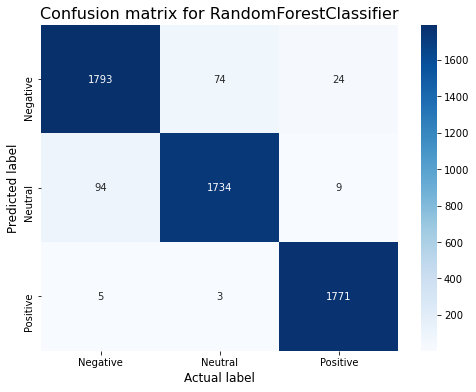

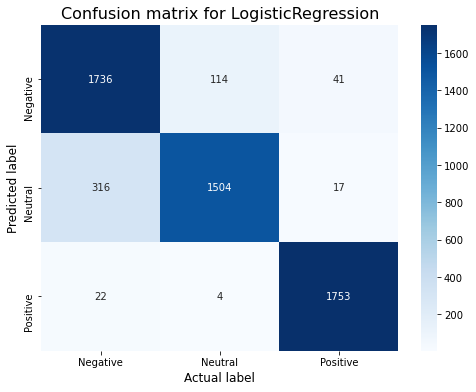

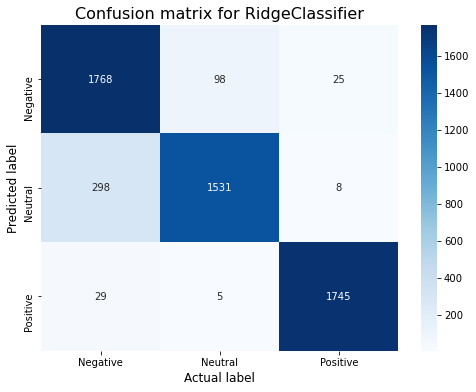

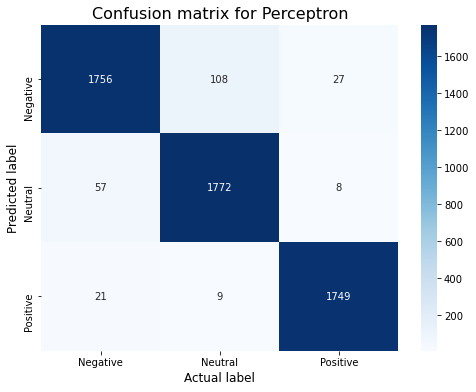

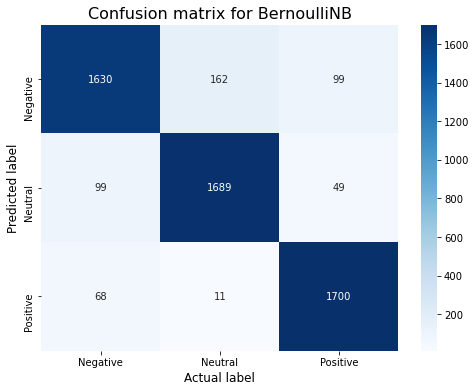

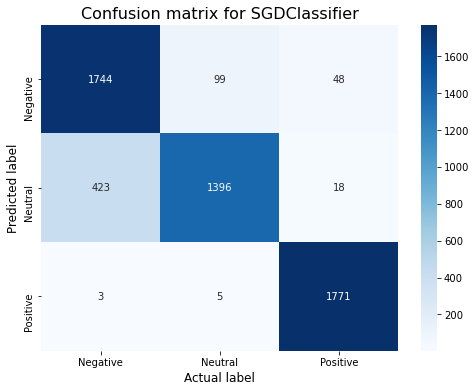

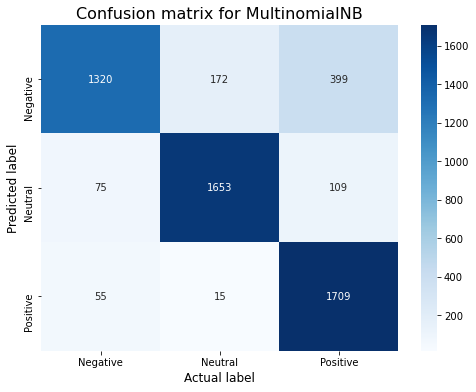

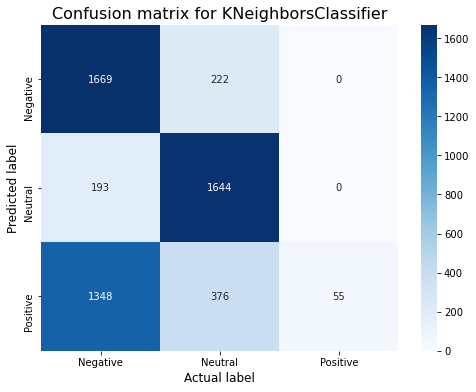

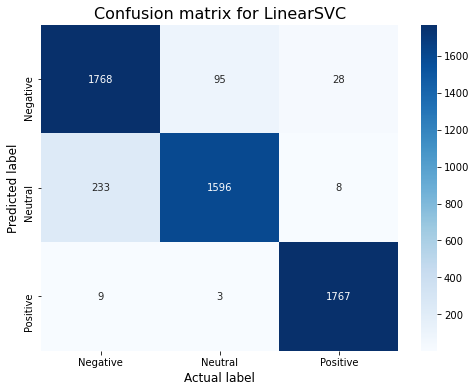

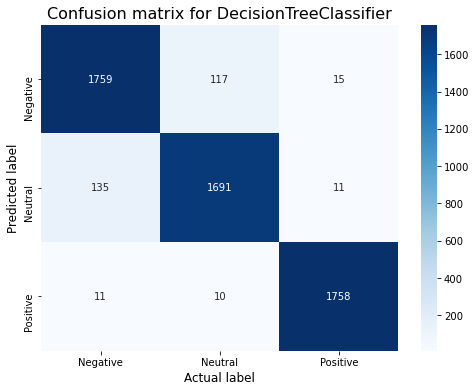

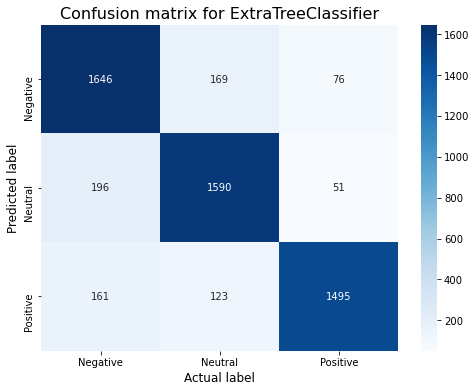

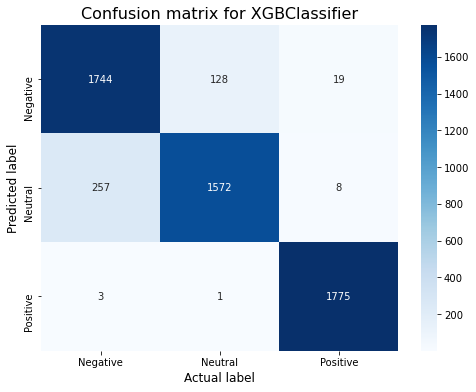

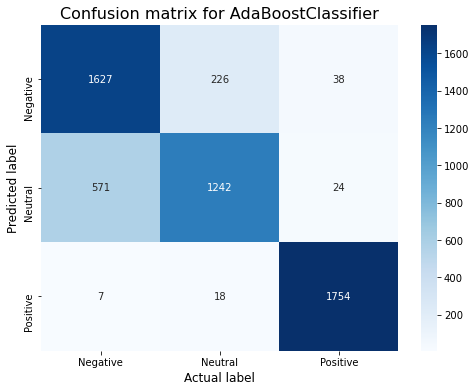

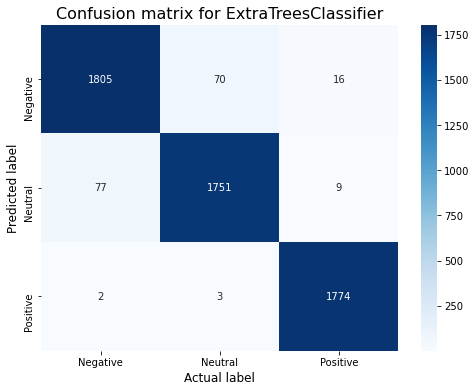

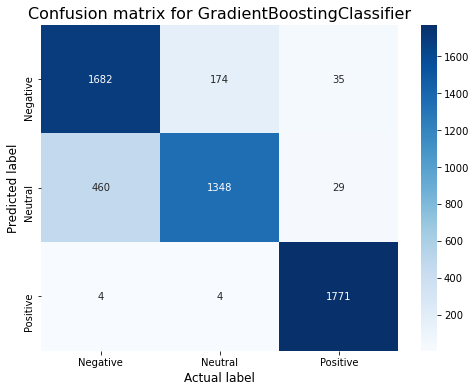

In [46]:
# Plot confusion matrix
for model in MLA:
    try:
        predictions = model.predict(X_test)
#        cr = classification_report(y_test, predictions)
        cm       = confusion_matrix(y_test, predictions)
        # .sort_valuesPlot classification report
#        print("Classification Report for:\n----------------------\n", MLA)
#        print(cr)
        # plot confusion matrix 
        Alg = model.__class__.__name__
#        print("Confusion Matrix for:\n----------------------\n", Alg)
        plt.figure(figsize=(8,6))
        sentiment_classes = ['Negative', 'Neutral', 'Positive']
        sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                    xticklabels=sentiment_classes,
                    yticklabels=sentiment_classes)
        plt.title('Confusion matrix for '+Alg, fontsize=16)
        plt.xlabel('Actual label', fontsize=12)
        plt.ylabel('Predicted label', fontsize=12)
        plt.show()
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass

In [47]:
#Sort the 5 best models 
algorithms.sort_values(by = ['CV Score'], ascending = False, inplace = True)    
algorithms.head()

Algorithm  Accuracy  F1 Score  Recall Score  Precision Score  \
13    ExtraTreesClassifier     96.79     96.79         96.79            96.79   
0   RandomForestClassifier     96.20     96.20         96.20            96.20   
3               Perceptron     95.82     95.82         95.82            95.82   
9   DecisionTreeClassifier     94.57     94.57         94.57            94.57   
8                LinearSVC     93.17     93.17         93.17            93.17   

    CV Score    STD  
13     95.96  0.003  
0      95.22  0.003  
3      94.74  0.005  
9      93.49  0.004  
8      92.50  0.003

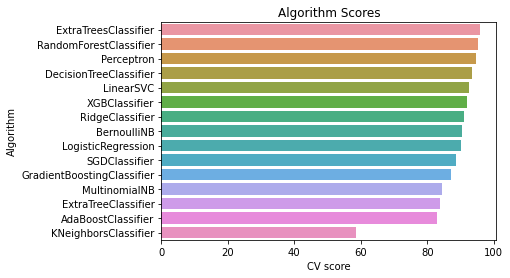

In [48]:
#Plot them
g = sns.barplot("CV Score", "Algorithm", data = algorithms)
g.set_xlabel("CV score")
g = g.set_title("Algorithm Scores")

In [49]:
# convert the sentiments to categorical for plotting: 0 -> Neutral; 1 -> Positive; and 2 -> Negative
def convert_sentiment_string(sentiment):
    if  sentiment == 1:
        return "Positive"
    elif sentiment == 0:
        return "Neutral"
    elif sentiment == 2:
        return "Negative"
l = [convert_sentiment_string(x) for x in list(Counter(y).keys())]
l

['Neutral', 'Positive', 'Negative']

In [50]:
# Calculate the ROC curves. Note, this is a multiclass system
# Note some of the models do not have decision_function function. See excerptions. Instead use predict

classes = list(Counter(y).keys())
n_classes = len(classes)
y_binarize = label_binarize(y_sm, classes=classes)

# Split into training and testing data
X_train , X_test , y_train , y_test = train_test_split(X_sm , y_binarize, test_size=0.2,random_state=110)


# Plot it only for the best model
MLA_best = [
    ExtraTreesClassifier(),
]

for model in MLA_best:
    try:
        # Classifier
        clf = OneVsRestClassifier(model)
        y_score = clf.fit(X_train, y_train).predict(X_test) #decision_function 

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        thresh = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], thresh[i] = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass

--------------------------
ROC plot for ExtraTreesClassifier
--------------------------


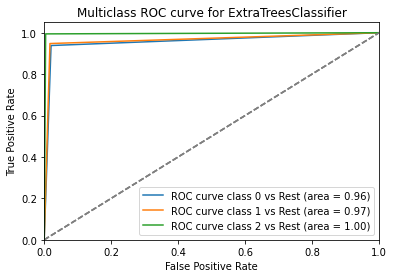

In [51]:
# Plot the ROC curves. Note, this is a multiclass system

for model in MLA_best:
    try:
        Alg = model.__class__.__name__
        print('--------------------------')
        print('ROC plot for',Alg)
        print('--------------------------')
        colors = cycle(['blue','cyan','red']) # Choose the color up to the number of classes
       # linestyles = cycle(['-', '--','--'])
        for i, color in zip(range(n_classes),colors):
            plt.plot(fpr[i], tpr[i], label='ROC curve class {0} vs Rest (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]),lw=1.5)
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Multiclass ROC curve for '+ str(Alg))
            plt.plot([0, 1], [0, 1], 'k--',color='gray')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.legend(loc='best')
           # plt.savefig('Multiclass ROC',dpi=300); # We can save it to file
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass

In [52]:
#colors = cycle(['blue','cyan','red']) # Choose the color up to the number of classes
#for i, color in zip(range(n_classes),colors):
#    for model in MLA:
#        Alg = model.__class__.__name__
#        plt.plot(fpr[i], tpr[i], label='ROC curve class {0} vs Rest (area = {1:0.2f})'
#                       ''.format(i, roc_auc[i]),lw=1.5)
#        plt.xlabel('False Positive Rate')
#        plt.ylabel('True Positive Rate')
#        plt.title('Multiclass ROC curve for '+ str(Alg))
#        plt.plot([0, 1], [0, 1], 'k--',color='gray')
#        plt.xlim([0.0, 1.0])
#        plt.ylim([0.0, 1.05])
#        plt.legend(loc='best')

<a id="5"></a>
## <p style="background-color:#ffb037;font-family:newtimeroman;color:#2243b6;font-size:200%;text-align:center;border-radius:8px 10px;">END OF CASE STUDY </p>  

In [53]:
# Now do some further NLP on the dataset- Below can be ignored or used for further NLP learning
df = pd.read_csv('Tweets.csv')

In [54]:
df = df[['text','airline_sentiment']]
df.head()

text airline_sentiment
0                @VirginAmerica What @dhepburn said.           neutral
1  @VirginAmerica plus you've added commercials t...          positive
2  @VirginAmerica I didn't today... Must mean I n...           neutral
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative

In [55]:
import re
r = re.compile(r'([@])(\w+)\b' )
AllReferences = map(lambda x: r.findall(x),df['text'])

import itertools
AllUniqueReferencesCombined = set(list(itertools.chain.from_iterable(AllReferences)))
References = map(lambda x: x[0]+x[1],AllUniqueReferencesCombined)

file = open('References.txt', 'a')
for each in References:
    file.write(each+ '\n')
file.close()

In [56]:
import nltk
def GetNounPhrases(s):
    try:
        sentences = nltk.sent_tokenize(s)
        sentences = [nltk.word_tokenize(sent) for sent in sentences]
        sentences = [nltk.pos_tag(sent) for sent in sentences]
    except:
        return[]
    else:
            grammar = r'NP:{<DT><NN|NNS|NNP|NNPS>*<NN|NNS|NNP|NNPS>}'
            
            cp = nltk.RegexpParser(grammar)
            
            noun_phrases_list = [[''.join(leaf[0] for leaf in tree.leaves()) 
                                 for tree in cp.parse(sent).subtrees()
                                 if tree.label()=='NP'] 
                                 for sent in sentences]
            return noun_phrases_list

for group, sub in df.groupby('airline_sentiment'):
    noun_phrases = map(lambda x: GetNounPhrases(x), sub['text'])
    noun_phrases = list(itertools.chain.from_iterable(noun_phrases))
    AllNounPhrases = set(list(itertools.chain.from_iterable(noun_phrases)))
    filename = 'NounPhrasesFor'+str(group)+'Review.txt'
    file = open(filename, 'a')
    for each in AllNounPhrases:
        file.write(each+'\n')
    file.close()